<a href="https://colab.research.google.com/github/netomap/flower_classification_/blob/master/Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [5]:
diretorio = '/content/gdrive/My Drive/Colab Notebooks/figuras'
data_dir = pathlib.Path(diretorio)
images = list(data_dir.glob('*'))
print ('total de imagens: {}'.format(len(images)))

total de imagens: 25


In [14]:
image_data = []
for caminho in images:
  img = Image.open(caminho)
  img = img.resize((220, 220))
  image_data.append(np.array(img.getdata()).reshape((220, 220, 3)))

image_data = np.array(image_data)
image_data = image_data * (1./255)
print (image_data.shape)

(25, 220, 220, 3)


In [11]:
model = keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/flower_class_model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            multiple                  780       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_6 (Dropout)          multiple                  0         
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  259320    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_7 (Dropout)          multiple                  0         
_________________________________________________________________
conv2d_8 (Conv2D)            multiple                 

In [12]:
class_names = np.array(['tulips', 'roses', 'daisy', 'sunflowers', 'dandelion'])

In [15]:
predicao = model.predict(image_data)

In [16]:
classe_predita = []
for vetor in predicao:
  classe_predita.append(class_names[np.argmax(vetor)])

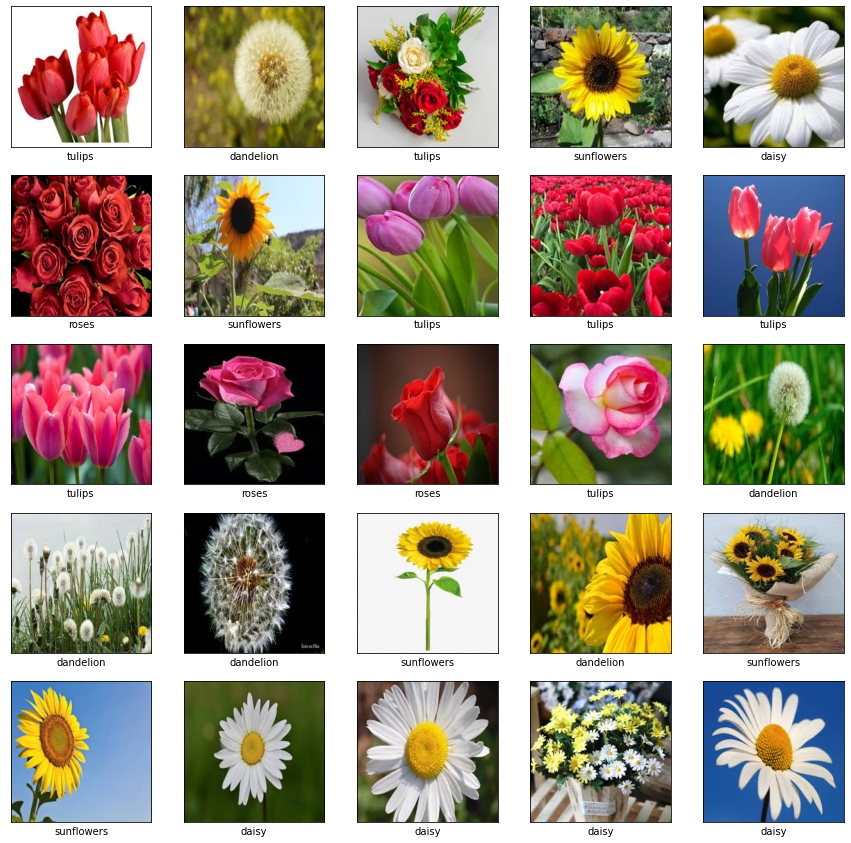

In [20]:
plt.figure(figsize=(15, 15))
for k, figura in enumerate(image_data):
  plt.subplot(5, 5, k+1)
  plt.imshow(figura)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(classe_predita[k])
plt.show()

In [23]:
# Parece que acertou 23 de 25 figuras, trocando duas figuras de rosas e classificando como tulipas.
# assim, acurácia no teste de 23/25
print ('Acuracia de {:0.2f} %'.format(23*100/25))

Acuracia de 92.00 %
